K-Nearest Neighbor

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [123]:
# Load the dataset
data=pd.read_csv('emissions_reduction_data.csv')
data.head()

,energy_efficiency,renewable_ratio,technology_cost,emission_reduction
0,68.727006,0.373641,7569.984799,0
1,97.535715,0.332912,2660.607960,0
2,86.599697,0.176154,4119.757249,0
3,79.932924,0.607267,6969.525732,1
4,57.800932,0.476624,5338.804101,0


In [124]:
#checking for the missing value
data.isnull().sum()

energy_efficiency     0
renewable_ratio       0
technology_cost       0
emission_reduction    0
dtype: int64

In [125]:
#check shape
data.shape

(10000, 4)

In [126]:
data.columns

Index(['energy_efficiency', 'renewable_ratio', 'technology_cost',
       'emission_reduction'],
      dtype='object')

In [158]:
#feature selection and target selection
X= data[['energy_efficiency', 'renewable_ratio', 'technology_cost',
       ]]
y=data['emission_reduction']

In [159]:
#Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [160]:
#Normalize the values
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [161]:
#Let us set k to 5 and check
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [162]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [163]:
#Accuracy Score
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


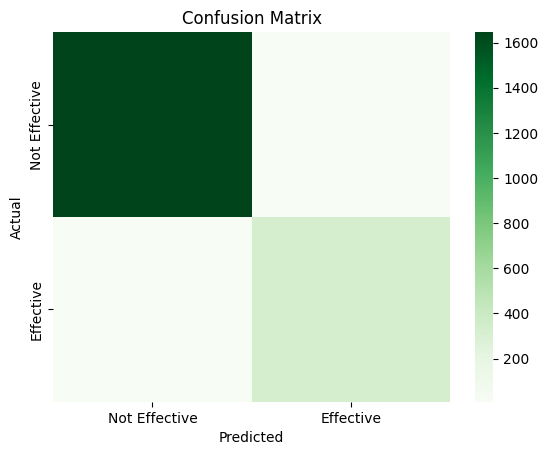

In [164]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=False, fmt='.1f', cmap='Greens',
            xticklabels=['Not Effective','Effective'],
            yticklabels=['Not Effective','Effective'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [165]:
#Classifiation report
cr= classification_report(y_test,y_pred,target_names=['NOt effective','effective'])
print(cr)

               precision    recall  f1-score   support

NOt effective       0.99      0.99      0.99      1657
    effective       0.97      0.97      0.97       343

     accuracy                           0.99      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.99      0.99      0.99      2000



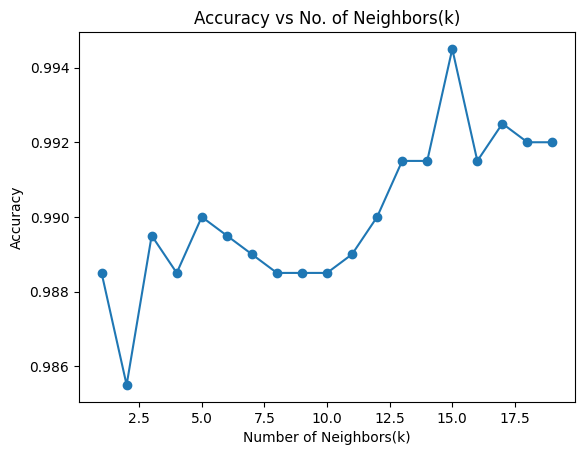

In [166]:
#Trying with different k values
acc_scores=[]
k_values=range(1,20)

for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))
#plotting acc vs k
plt.plot(k_values,acc_scores,marker='o')
plt.title('Accuracy vs No. of Neighbors(k)')
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Accuracy')
plt.show()